### 서울시 범죄 현황 분석

#### 1. 필수 라이브러리 불러오기

In [1]:
# 경고창 안 보이게 하기
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd

#### 강남 3구가 안전한지 알아보고자 하는 것이 목표!!
- 데이터를 읽는 과정에서 주의해야 할 점\
  데이터가 관서별로 되어있음. >> 경찰서 목록을 소속 구별로 변경하고 싶음.(경찰서 이름으로 구 정보를 알아야 함.) \
  서울시는 한 구에 하나 혹은 두 군데의 경찰서가 위치해 있음.
  구 이름과 경찰서 이름이 다른 경찰서도 있음.

#### 지도 정보를 얻을 수 있는 Google Maps

- Google Maps API에 접속하여 가입.(교육 목적으로 가입할 경우 1년 무료)
- api 키가 발급되므로 키를 복사해서 준비함.
- 터미널에 접속하여 pip install googlempas라는 명령어로 파이썬에 googlemaps를 사용할 수 있도록 설치함.

#### 2. 데이터 정리

- crime_in_Seoul_include_gu_name 데이터는 Google Maps를 이용해서 주소와 위도, 경도 정보 얻어서 만들어진 데이터

In [3]:
# 데이터 불러오기
crime_anal_raw = pd.read_csv('./data/crime_in_Seoul_include_gu_name.csv',
                             encoding='utf-8')
crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [4]:
# Pivot_tabel을 이용해서 데이터 정리하기

#index_col=0을 사용하면 저장되어 있는 index를 index로 사용.
crime_anal_raw = pd.read_csv('./data/crime_in_Seoul_include_gu_name.csv',
                             encoding='utf-8', index_col=0)

# pivot_table을 이용하여 데이터를 관서별에서 구별로 바꿔줌
crime_anal = pd.pivot_table(crime_anal_raw, index='구별',aggfunc=np.sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,관서명,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,,
강남구,349,449,18,21,강남서수서서,10,13,1650,3850,3705,4284
강동구,123,156,8,6,강동서,3,4,789,2366,2248,2712
강북구,126,153,13,14,강북서,8,7,618,1434,2348,2649
관악구,221,320,14,12,관악서,8,9,827,2706,2642,3298
광진구,220,240,26,14,광진서,4,4,1277,3026,2180,2625


In [5]:
crime_anal['강간검거율'] = crime_anal['강간 검거'] / crime_anal['강간 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거'] / crime_anal['강도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거'] / crime_anal['살인 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거'] / crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거'] / crime_anal['폭력 발생'] * 100

# 검거 건수는 검거율로 대체할 수 있어서 삭제.
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal.head()

,강간 발생,강도 발생,관서명,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,
강남구,449,21,강남서수서서,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,강동서,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,강북서,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,320,12,관악서,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,광진서,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619


- 데이터를 보면 이상한 점이 보임. 
- 바로 검거율에 100이 넘는 숫자들이 보인다는 것. 
- 아마도 그 전년도 발생 건수에 대한 검거가 포함되기 때문이라고 예상되는데, 사실 그 부분에 대해서 일일히 조사하여야 하지만 이 데이터는 학습목적으로 진행하고 있으니 깊은 고민 없이 100이 넘는 숫자는 100으로 처리.

In [6]:
con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100
    
crime_anal.head()

,강간 발생,강도 발생,관서명,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,
강남구,449,21,강남서수서서,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,강동서,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,강북서,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,관악서,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,광진서,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [7]:
# 컬럼명에 발생이라는 단어를 삭제하자.
crime_anal.rename(columns = {'강간 발생':'강간',
                             '강도 발생':'강도',
                             '살인 발생':'살인',
                             '절도 발생':'절도',
                             '폭력 발생':'폭력'}, inplace=True)
crime_anal.head()

,강간,강도,관서명,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,
강남구,449,21,강남서수서서,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,강동서,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,강북서,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,관악서,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,광진서,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


#### 3. 데이터 표현을 위해 다듬기

- 위 데이터를 보면 강도, 살인 사건은 두 자릿수인데, 절도와 폭력은 네 자릿수. 
- 물론 숫자 그 자체로도 중요하지만 각각을 비슷한 범위에 놓고 비교하는 것이 편리할 수 있음.
- 각 항목의 최대값을 1로 두면 추후 범죄 건수를 종합적으로 비교할 때 편리할 것임. = 이런 방법을 정규화 라고 함.

In [8]:
# 발생 건수 정규화
from sklearn import preprocessing

col = ['강간', '강도', '살인', '절도', '폭력']

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled,
                              columns = col,
                              index = crime_anal.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619


In [9]:
# 구별 인구수와 CCTV 개수 데이터를 불러옴
result_CCTV = pd.read_csv('./data/CCTV_result.csv', encoding='UTF-8',
                         index_col='구별')
crime_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707


In [10]:
# 각 범죄 발생 건수에 대해 합을 구해 '범죄'라는 컬럼을 생성
col = ['강간', '강도', '살인', '절도', '폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col],axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438


In [11]:
# 위와 마찬가지로 각 검거율의 합을 구하여 '검거'라는 컬럼을 생성
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211
구로구,0.515850,0.588235,0.500000,0.435169,0.359423,58.362989,73.333333,75.000000,38.072805,80.877951,447874.0,1561,2.398678,325.647079
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.000000,100.000000,56.668794,86.465433,255082.0,1015,0.589867,423.928929
노원구,0.273775,0.117647,0.666667,0.386589,0.292268,61.421320,100.000000,100.000000,36.525308,85.530665,569384.0,1265,1.736946,383.477292
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.000000,100.000000,44.967074,87.626093,348646.0,485,0.318627,432.593167


#### 4. 데이터 시각화

In [47]:
# eaborn을 활용하여 데이터 시각화
# 한글 폰트 지정
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform

path = "c:/Windows/Fonts/NanumGothic.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == "/data/NanumGothic.ttf":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

Unknown system... sorry~~~~


In [40]:
# 데이터를 재확인
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,0.894540,85.463066
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,0.223310,85.550226
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,0.298949,94.070728
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,0.522733,85.212224
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,0.406888,96.375820


/home/jynah119/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/jynah119/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/jynah119/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/jynah119/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/jynah119/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/

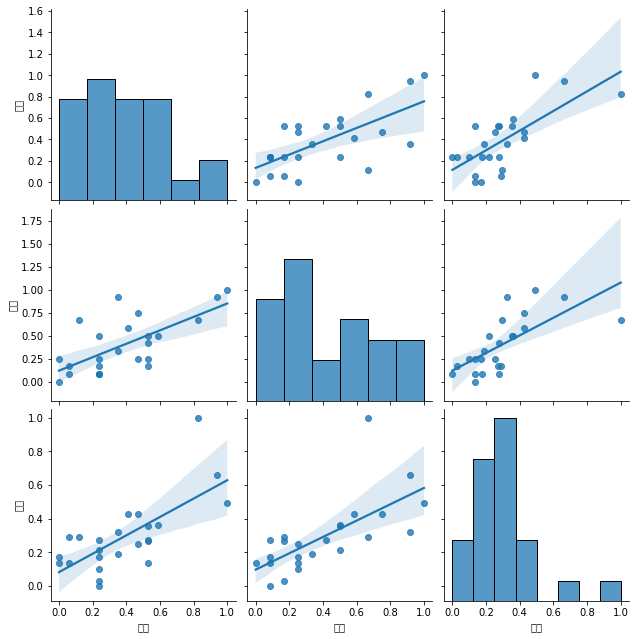

In [22]:
# 강도와 폭력, 살인과 폭력, 강도와 살인의 상관관계를 확인하자
sns.pairplot(crime_anal_norm, vars=['강도', '살인', '폭력'], kind='reg', height=3)
plt.show()

In [23]:
# 검거율의 합계인 검거 항목 최고 값을 100으로 한정하고 그 값으로 정렬
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_nrom_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_nrom_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.589867,97.997139
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.034438,96.375820
동대문구,0.204611,0.470588,0.250000,0.314061,0.250887,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.490147,95.444250
용산구,0.265130,0.529412,0.250000,0.169004,0.133128,89.175258,100.0,100.0,37.700706,83.121951,244203.0,1624,1.346674,94.776790


/home/jynah119/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.draw()
/home/jynah119/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.draw()
/home/jynah119/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.draw()
/home/jynah119/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.draw()
/home/jynah119/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.draw()
/home/jynah119/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4

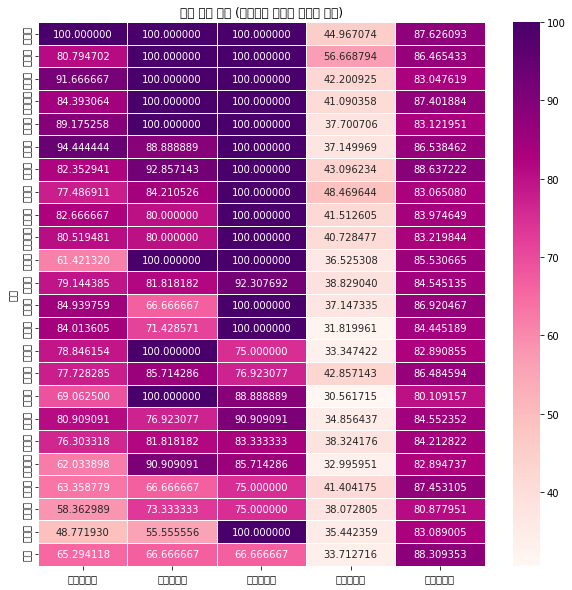

In [24]:
# 범죄 검거 비율 heatmap으로 시각화
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f',
           linewidths=.5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

- 결과를 보면 절도 검거율이 다른 검거율에 비해 낮다는 것을 알 수 있음.
- 그리고 그래프 하단으로 갈수록 검거율이 낮은데 그 속에 강남 3구 중에서 '서초구'가 보임.
- 전반적으로 검거율이 우수한 구는 '도봉구','광진구','성동구'로 보임.

/home/jynah119/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.draw()
/home/jynah119/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.draw()
/home/jynah119/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
/home/jynah119/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from current font.
  fig.canvas.draw()
/home/jynah119/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.draw()
/home/jynah119/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from current font.


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyp

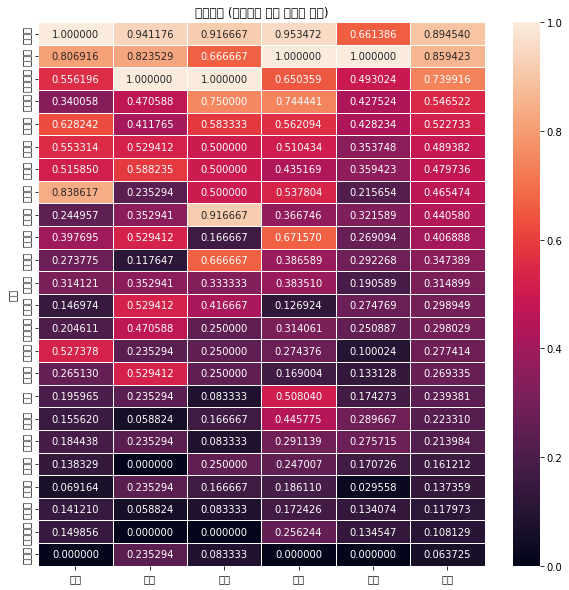

In [25]:
# 범죄 발생 건수 heatmap 시각화
target_col=['강간','강도','살인','절도','폭력','범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)
plt.figure(figsize=(10,10))

sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidth=.5)
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

- 발생 건수로 보니 '강남구', '양천구', '영등포구'가 범죄 발생 건수가 높음.
- 그리고 '송파구'와 '서초구'도 낮다고 볼 수 없음. 
- 강남 3구가 안전하다고 할 수 있을지 의문이 생김.

#### 5. 지도 시각화

- 앞선 자료를 시각화 해보기 위해서는 서울시 '구'별 경계선을 그릴 수 있는 json 파일이 있어야 함.
- 그 데이터가 skorea_municipalities_geo_simple.json이기에 다운함.

In [26]:
# json파일 로딩
import json
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [33]:
# 서울시의 중심의 위도와 경도 정보를 먼저 입력하고 경계선을 그리기.
# 컬러맵은 살인 발생 건수로 지정.
!pip install folium
import folium

#map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 #tiles='Stamen Toner')

#map.choropleth(geo_data = geo_str,
               #data = crime_anal_norm['살인'],
               #columns = [crime_anal_norm.index, crime_anal_norm['살인']],
               #fill_color = 'PuRd', #puRd, YlGnBu
               #key_on = 'feature.id')
#map


map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(
    geo_data = geo_str,
    data = crime_anal_norm,
    columns = [crime_anal_norm.index, '살인'],
    key_on = 'feature.id',
    fill_color = 'PuRd',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name ='서울시 살인 발생 건수'
).add_to(map)

map



Defaulting to user installation because normal site-packages is not writeable


- 결과를 보면 살인 발생 건수에서 강남 3구가 안전하다고 보기는 어려울 것 같음.

In [34]:
# 강간 발생 건수로 다시 그려보자.

map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(
    geo_data = geo_str,
    data = crime_anal_norm,
    columns = [crime_anal_norm.index, '절도'],
    key_on = 'feature.id',
    fill_color = 'PuRd', #puRd, YlGnBu
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name ='서울시 살인 발생 건수'
).add_to(map)

map

- 절도도 강남 3구가 안전한지 의심이 듬.

In [35]:
# 범죄 발생건수

map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(
    geo_data = geo_str,
    data = crime_anal_norm,
    columns = [crime_anal_norm.index, '범죄'],
    key_on = 'feature.id',
    fill_color = 'PuRd', #puRd, YlGnBu
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name ='서울시 살인 발생 건수'
).add_to(map)

map

- 역시 강남 3구와 강서구 주변이 범죄 발생 건수가 높은 것으로 나타나고 있음. 
- 그러나 인구수를 고려해야 할 것 같음. 즉 인구 대비 범죄 발생 비율을 알아보는 것이 중요.

In [37]:
# 범죄 전체 발생건수에 인구수를 나누고 소수점 밑으로 가서 적절한 값을 곱함.
tmp_criminal = crime_anal_norm['살인']/ crime_anal_norm['인구수'] *1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(
    geo_data = geo_str,
    data = tmp_criminal,
    columns = [crime_anal.index, tmp_criminal],
    key_on = 'feature.id',
    fill_color = 'PuRd', #puRd, YlGnBu
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name ='서울시 살인 발생 건수'
).add_to(map)

map

- 결과를 보면 인구 대비 범죄 발생 건수로 보면 강남 3구가 1위는 아니지만 안전도가 제일 높다고 말할 수는 없을 것 같음.
- 그런데 중구와 종로구의 범죄율이 엄청 높아짐. 
- 아마 거주 인구는 적고, 관광지여서 그런게 아닐까 추측해 봄.